In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# Initialize data set

In [5]:
path = Path('data')

In [20]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

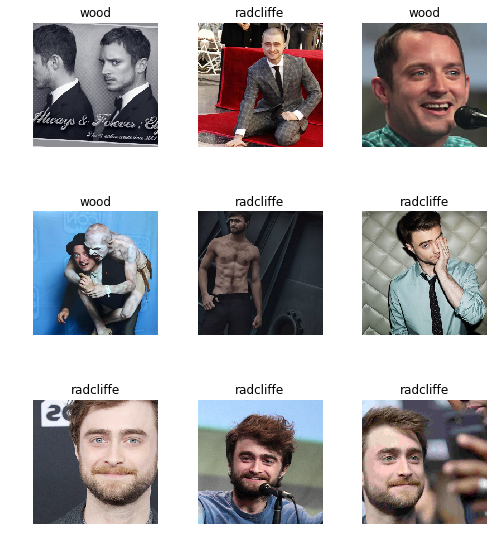

In [21]:
data.show_batch(rows=3, figsize=(7,8))

# Training the model (resnet34)

In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(4)

Total time: 00:39
epoch  train_loss  valid_loss  error_rate
1      1.299257    1.411869    0.794521    (00:09)
2      1.088796    0.822001    0.342466    (00:09)
3      0.888079    0.523779    0.123288    (00:09)
4      0.764123    0.448023    0.109589    (00:10)



In [24]:
learn.save('stage-1')

# Results

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

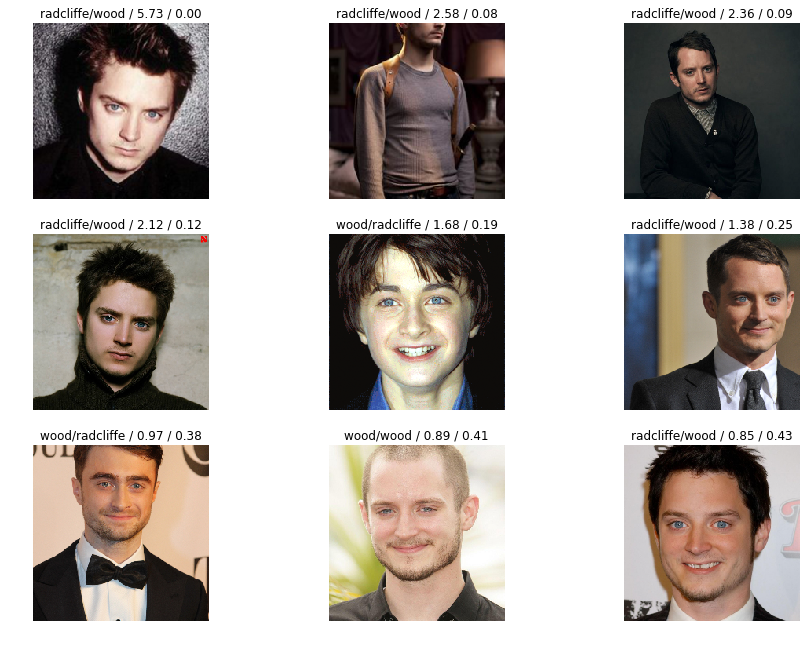

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

## Unfreezing, fine-tuning, and learning rates

In [27]:
learn.unfreeze()

In [28]:
learn.fit_one_cycle(1)

Total time: 00:08
epoch  train_loss  valid_loss  error_rate
1      0.926323    0.746508    0.301370    (00:08)



In [35]:
learn.load('stage-1')

In [30]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


In [33]:
doc(lr_find)

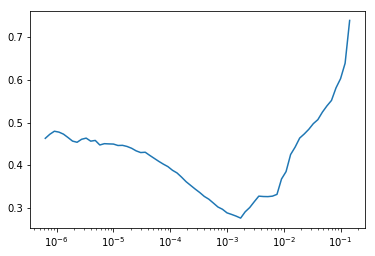

In [31]:
learn.recorder.plot()

In [36]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

Total time: 00:37
epoch  train_loss  valid_loss  error_rate
1      0.456908    0.351141    0.123288    (00:08)
2      0.386270    0.559949    0.123288    (00:09)
3      0.308177    0.325063    0.068493    (00:10)
4      0.236779    0.318237    0.068493    (00:09)



# Lets try resnet 50!

In [6]:
#Create the data with higher size and lower batch size
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=320, num_workers=4, bs=16).normalize(imagenet_stats)

In [9]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

In [10]:
learn50.fit_one_cycle(8, max_lr=slice(1e-3))

Total time: 01:16
epoch  train_loss  valid_loss  error_rate
1      1.381051    0.872292    0.394737    (00:09)
2      1.016705    0.691827    0.223684    (00:09)
3      0.797109    0.615620    0.210526    (00:09)
4      0.636389    0.564074    0.184211    (00:09)
5      0.517699    0.502476    0.157895    (00:10)
6      0.431859    0.451131    0.144737    (00:09)
7      0.352944    0.435261    0.157895    (00:09)
8      0.301544    0.440452    0.157895    (00:09)



In [12]:
learn50.save('stage-1-50')

In [18]:
learn50.unfreeze()
learn50.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.292055    0.508713    0.157895    (00:11)
2      0.390325    0.935855    0.315789    (00:11)
3      0.371798    0.304541    0.131579    (00:12)
4      0.282426    0.141289    0.052632    (00:11)



In [17]:
learn50.load('stage-1-50')

In [19]:
interp = ClassificationInterpretation.from_learner(learn50)

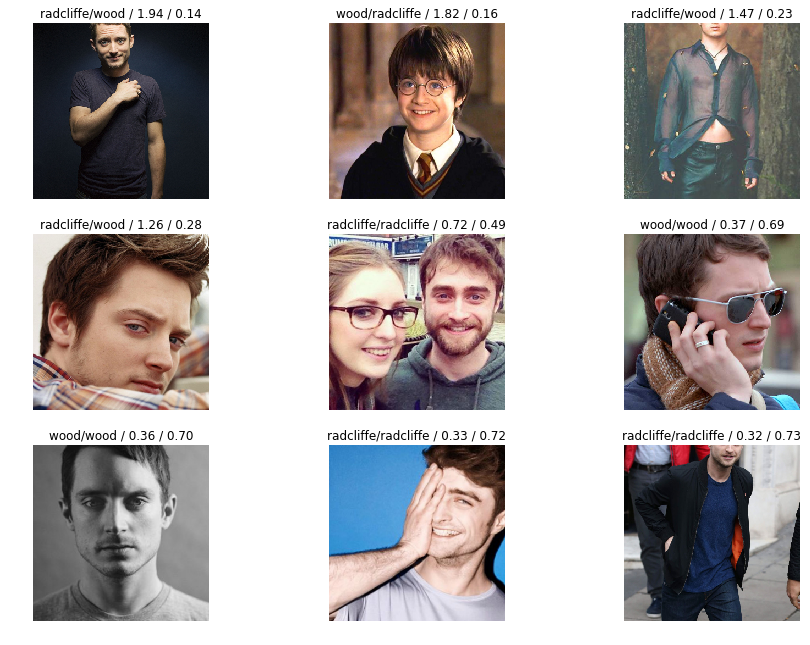

In [20]:
interp.plot_top_losses(9, figsize=(15,11))